1. Installing Libraries!

In [1]:
!pip install pandas numpy matplotlib seaborn

2. Air Quality Dataset
Data retrieved From EPA Outdoor Air Quality Dataset: [DataSet](https://www.epa.gov/outdoor-air-quality-data/download-daily-data)

In [3]:
import pandas as pd
df = pd.read_csv('ad_viz_plotval_data.csv')

print(df.head())


         Date Source   Site ID  POC  Daily Mean PM2.5 Concentration     Units  \
0  01/01/2024    AQS  60010007    3                             6.4  ug/m3 LC   
1  01/02/2024    AQS  60010007    3                             3.6  ug/m3 LC   
2  01/03/2024    AQS  60010007    3                             3.9  ug/m3 LC   
3  01/04/2024    AQS  60010007    3                             5.1  ug/m3 LC   
4  01/05/2024    AQS  60010007    3                             4.9  ug/m3 LC   

   Daily AQI Value Local Site Name  Daily Obs Count  Percent Complete  ...  \
0               36       Livermore                1             100.0  ...   
1               20       Livermore                1             100.0  ...   
2               22       Livermore                1             100.0  ...   
3               28       Livermore                1             100.0  ...   
4               27       Livermore                1             100.0  ...   

   Method Code                    Method Des

In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55016 entries, 0 to 55015
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            55016 non-null  object 
 1   Source                          55016 non-null  object 
 2   Site ID                         55016 non-null  int64  
 3   POC                             55016 non-null  int64  
 4   Daily Mean PM2.5 Concentration  55016 non-null  float64
 5   Units                           55016 non-null  object 
 6   Daily AQI Value                 55016 non-null  int64  
 7   Local Site Name                 54135 non-null  object 
 8   Daily Obs Count                 55016 non-null  int64  
 9   Percent Complete                55016 non-null  float64
 10  AQS Parameter Code              55016 non-null  int64  
 11  AQS Parameter Description       55016 non-null  object 
 12  Method Code                     

In [6]:
df = df.dropna()

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

3. Graphing Air Quality index (AQI) Data

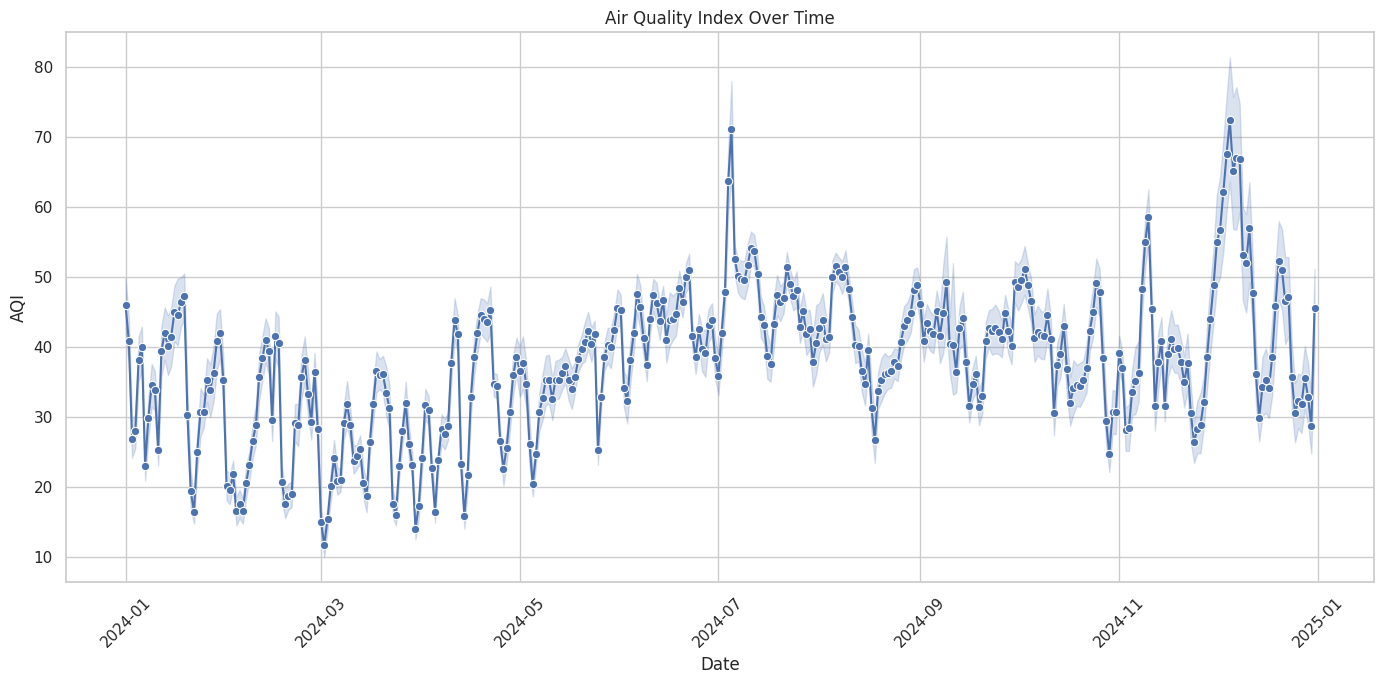

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#plot AQI vs Time
plt.figure(figsize=(14,7))
sns.lineplot(x='Date', y='Daily AQI Value', data=df,marker='o')
plt.title('Air Quality Index Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. Graphing AQI vs PM 2.5 Concentration

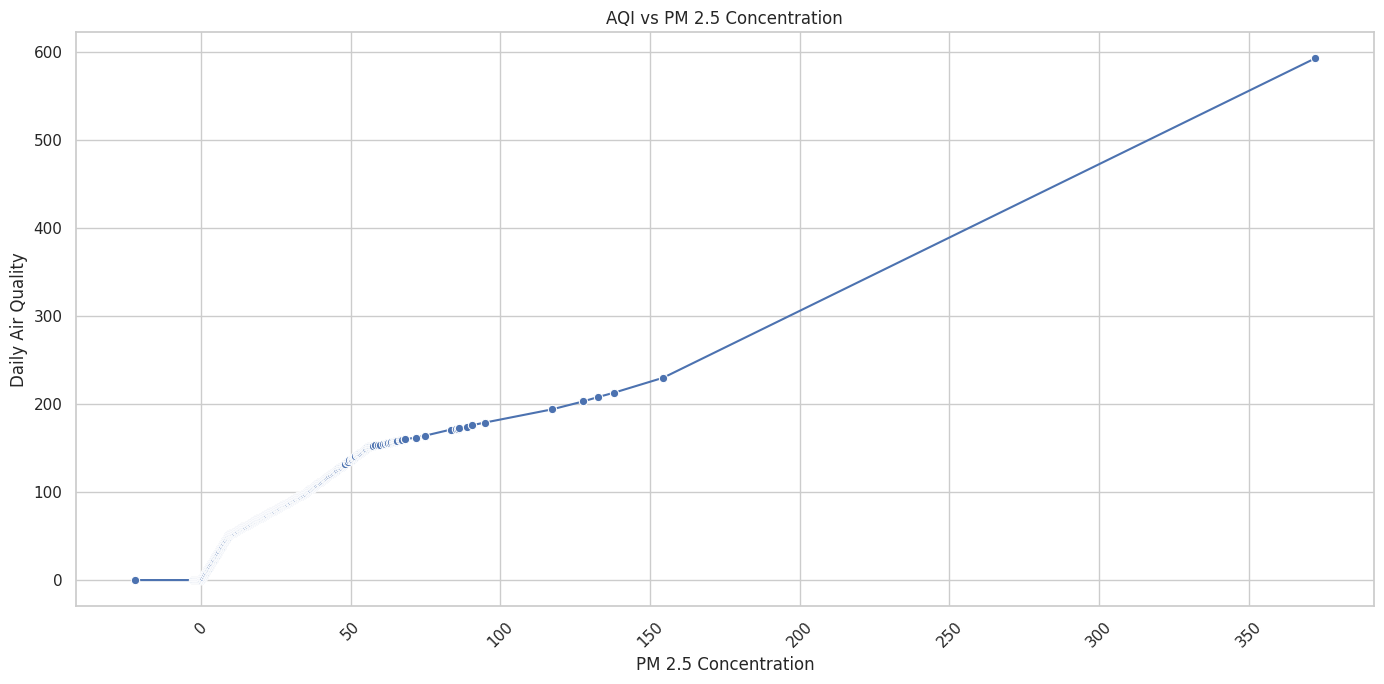

In [11]:
#plot  AQI vs PM 2.5
plt.figure(figsize=(14,7))

sns.lineplot(x='Daily Mean PM2.5 Concentration',y='Daily AQI Value',data=df,marker='o')
plt.title('AQI vs PM 2.5 Concentration')
plt.xlabel('PM 2.5 Concentration')
plt.ylabel('Daily Air Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Linear Regression to Evaluate AQI vs PM 2.5 correlation

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# prepare data for linear regression
X = df[['Daily Mean PM2.5 Concentration']].values
Y = df[['Daily AQI Value']].values

# Create and Fit the Model
model = LinearRegression()
model.fit(X,Y)

# Predict AQI Values
Y_predict = model.predict(X)

# Calculate R2 Value
r2 = r2_score(Y,Y_predict)
print(f'R^2 value: {r2:.4f}')

R^2 value: 0.8597


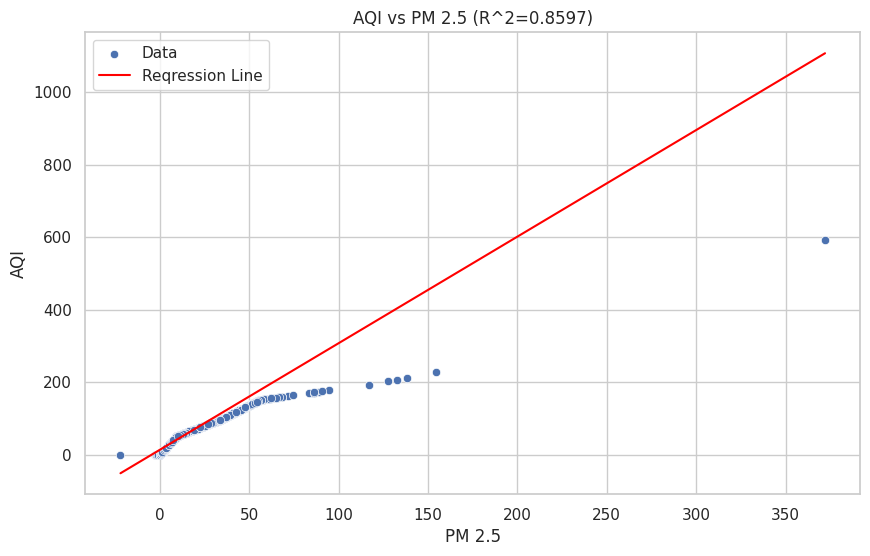

In [15]:
plt.figure(figsize=(10,6))

# Scatter Plot
sns.scatterplot(x='Daily Mean PM2.5 Concentration',y='Daily AQI Value',data=df,label='Data')
Y_predict=Y_predict.flatten()
# Regression Line
sns.lineplot(x=df['Daily Mean PM2.5 Concentration'], y=Y_predict, color='red', label='Reqression Line')

plt.title(f'AQI vs PM 2.5 (R^2={r2:.4f})')
plt.xlabel('PM 2.5')
plt.ylabel('AQI')
plt.legend()
plt.show()


6. Comparing AQI Data from Two Different Years

In [17]:
#2024
df_year1 = pd.read_csv('ad_viz_plotval_data.csv')
#2000
df_year2 = pd.read_csv('ad_viz_plotval_data2.csv')


In [19]:
df_year1['Date'] = pd.to_datetime(df_year1['Date'])
df_year2['Date'] = pd.to_datetime(df_year2['Date'])

# Extract day and month
df_year1['Month_Day'] = df_year1['Date'].dt.strftime('%m-%d')
df_year2['Month_Day'] = df_year2['Date'].dt.strftime('%m-%d')

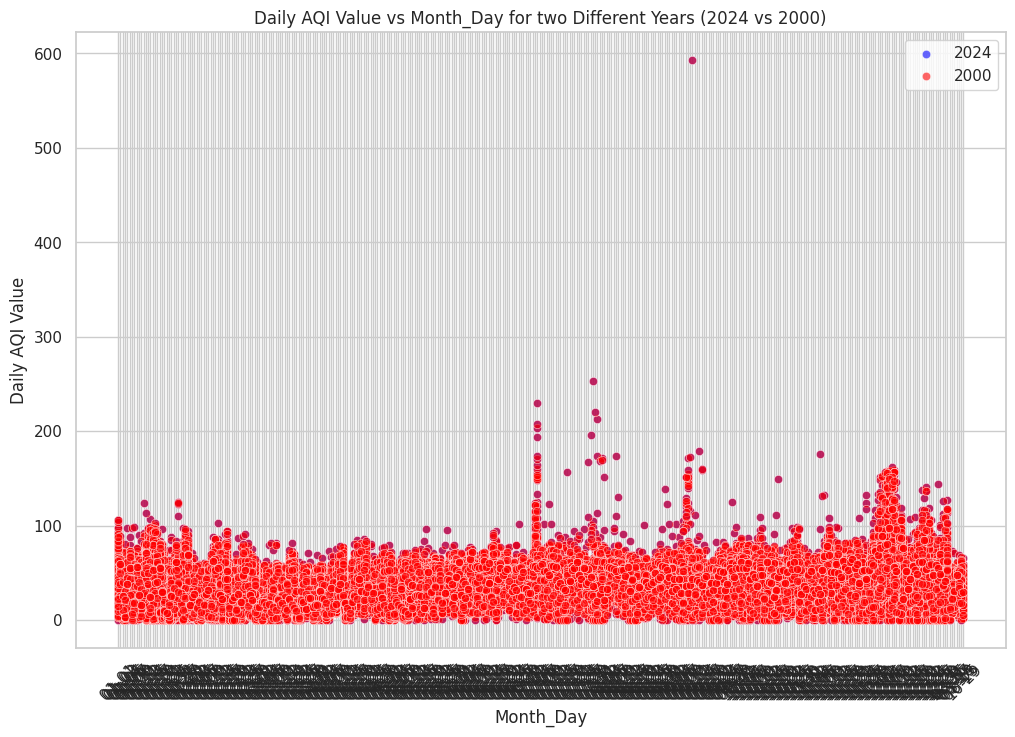

In [20]:
plt.figure(figsize=(12,8))

# plot year 1 (2024)
sns.scatterplot(x='Month_Day',y='Daily AQI Value',data=df_year1,color='blue',label='2024',alpha=0.6)
# plot year 2 (2000)
sns.scatterplot(x='Month_Day',y='Daily AQI Value',data=df_year1,color='red',label='2000',alpha=0.6)

plt.xticks(rotation=45)

plt.title('Daily AQI Value vs Month_Day for two Different Years (2024 vs 2000)')
plt.xlabel('Month_Day')
plt.ylabel('Daily AQI Value')
plt.legend()
plt.show()

In [21]:
df_year1['Month'] = df_year1['Date'].dt.month
df_year1['Year'] = df_year1['Date'].dt.year

df_year2['Month'] = df_year2['Date'].dt.month
df_year2['Year'] = df_year2['Date'].dt.year

In [22]:
# Calculate monthly average AQI for each year
monthly_avg_year1 = df_year1.groupby(['Year','Month'])['Daily AQI Value'].mean().reset_index()
monthly_avg_year2 = df_year2.groupby(['Year','Month'])['Daily AQI Value'].mean().reset_index()

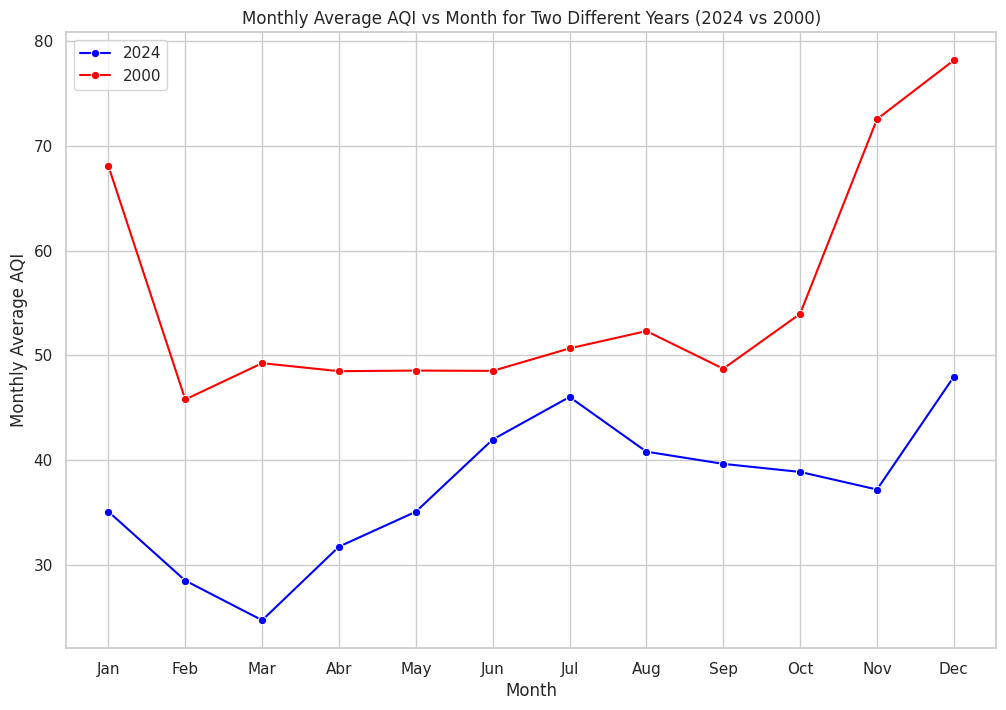

In [25]:
plt.figure(figsize=(12,8))

# plot for year 1 (2024)
sns.lineplot(x='Month',y='Daily AQI Value',data=monthly_avg_year1, marker='o',color='blue',label='2024')

# plot for year 2 (2000)
sns.lineplot(x='Month',y='Daily AQI Value',data= monthly_avg_year2, marker='o',color='red',label='2000')

plt.title('Monthly Average AQI vs Month for Two Different Years (2024 vs 2000)')
plt.xlabel('Month')
plt.ylabel('Monthly Average AQI')
plt.xticks(ticks=range(1,13),labels=['Jan','Feb','Mar','Abr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.show()

7. Graphing NO2 Data

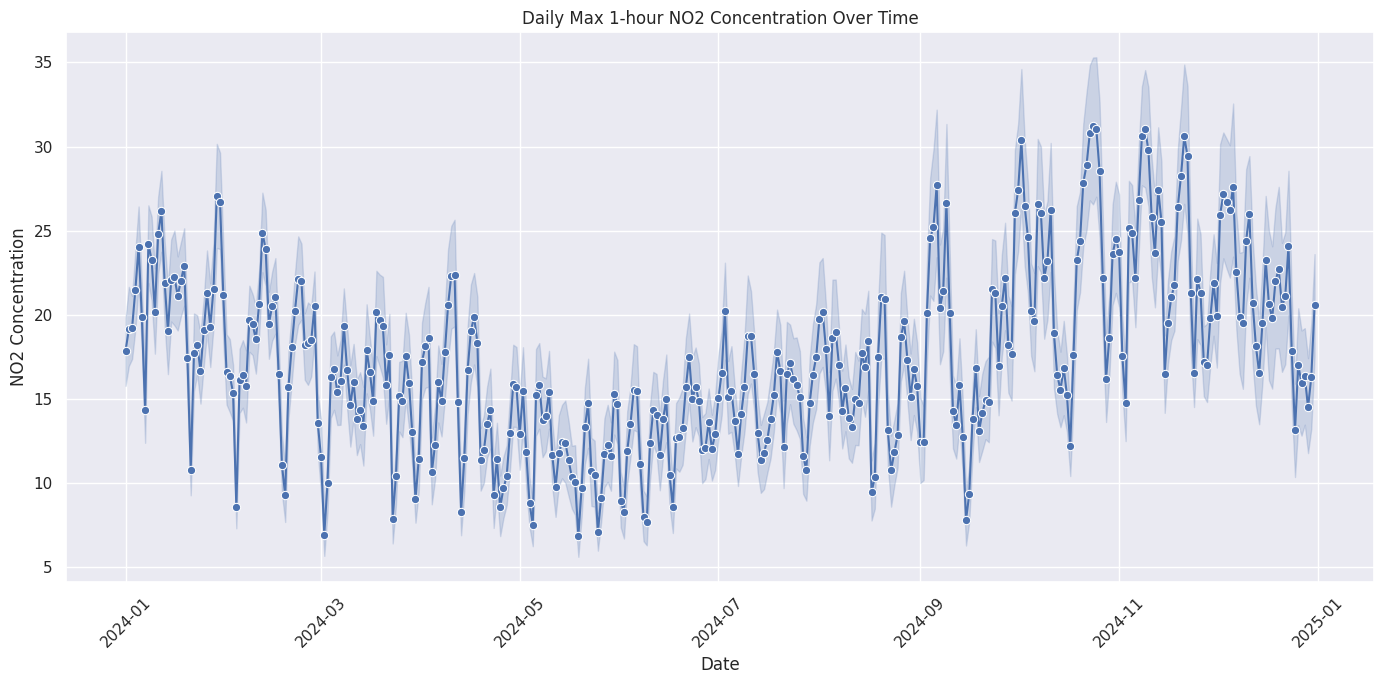

In [26]:
df_no2_2024_ma = pd.read_csv('ad_viz_plotval_data3.csv')
df_no2_2024_ma['Date'] = pd.to_datetime(df_no2_2024_ma['Date'])

sns.set(style='darkgrid')

plt.figure(figsize=(14,7))
sns.lineplot(x='Date',y='Daily Max 1-hour NO2 Concentration',data=df_no2_2024_ma,marker='o')
plt.title('Daily Max 1-hour NO2 Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('NO2 Concentration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
